# Logistic Regression of Pima Indian Diabetes

## Data Processing

### Import the Dataset

In [1]:
# Import necessary libraries for data manipulation, visualization, and analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('diabetes.csv')

**pandas** 
-A data manipulation and analysis library for Python.
-Provides data structures like Series (1D) and DataFrame (2D).

**numpy**
-A library for numerical computing in Python.
-Offers support for large, multi-dimensional arrays and matrices.
-Includes a collection of mathematical functions for array operations

In [2]:
# Display the first 10 rows of the dataset to understand its structure and initial values
dataset.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Display dataset information, including column data types and non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Displays information about the data:** *column names, data types, and if any data is missing*.

In [4]:
# Check for any missing values in each column of the dataset
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checks for any missing values in the data.

### Getting Inputs and Output

In [9]:
# Separate features (X) and target variable (y) from the dataset
X = dataset.iloc[:, :-1].values  # Select all columns except the last one as features
y = dataset.iloc[:, -1].values   # Select the last column as the target variable


In [10]:
# Display feature values (X)
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
# Display target variable values (y)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### Creating Training Set and the Test Set

In [12]:
# Import the train_test_split function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data, reserving 20% for testing and using 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Set options to control how values are printed in numpy arrays (for readability)
np.set_printoptions(suppress=True, precision=4)

The code splits a dataset into training and testing sets to evaluate a machine learning model's performance.
<br>
**X:** Feature set (input variables).
<br>
**y:** Target variable (output variable).
test_size=0.2: Allocates 20% of the data for testing and 80% for training.
random_state=0: Ensures reproducibility of the split

**np.set_printoptions(suppress=True, precision=4)**
<br>
* Configures how NumPy arrays are displayed in the console

**suppress=True:**
<br>
* Suppresses scientific notation for small floating-point numbers.
<br>
* Displays numbers in regular decimal format (e.g., 0.0000 instead of 1e-10).
<br>

**precision=4:**
<br>
* Sets the number of decimal places for floating-point numbers.
<br>
* Rounds numbers to four digits after the decimal point.

In [13]:
# Display training feature set
X_train

array([[  7.   , 150.   ,  78.   , ...,  35.2  ,   0.692,  54.   ],
       [  4.   ,  97.   ,  60.   , ...,  28.2  ,   0.443,  22.   ],
       [  0.   , 165.   ,  90.   , ...,  52.3  ,   0.427,  23.   ],
       ...,
       [  4.   ,  94.   ,  65.   , ...,  24.7  ,   0.148,  21.   ],
       [ 11.   ,  85.   ,  74.   , ...,  30.1  ,   0.3  ,  35.   ],
       [  5.   , 136.   ,  82.   , ...,   0.   ,   0.64 ,  69.   ]])

In [14]:
# Display testing feature set
X_test

array([[  1.   , 199.   ,  76.   , ...,  42.9  ,   1.394,  22.   ],
       [  2.   , 107.   ,  74.   , ...,  33.6  ,   0.404,  23.   ],
       [  4.   ,  76.   ,  62.   , ...,  34.   ,   0.391,  25.   ],
       ...,
       [  4.   , 142.   ,  86.   , ...,  44.   ,   0.645,  22.   ],
       [  3.   , 116.   ,  74.   , ...,  26.3  ,   0.107,  24.   ],
       [  1.   , 107.   ,  72.   , ...,  30.8  ,   0.821,  24.   ]])

In [15]:
# Display training target set
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
# Display testing target set
y_test


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [17]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit the scaler on training data and transform it
X_train = sc.fit_transform(X_train)

**from sklearn.preprocessing import StandardScaler:** Imports the StandardScaler class from the Scikit-learn preprocessing module.
<br>
**sc = StandardScaler():** Creates an instance of the StandardScaler.
<br>
**X_train = sc.fit_transform(X_train):** Fits the scaler to the training data and transforms it, standardizing the features.
<br>

In [18]:
# Display the scaled training data
X_train

array([[ 0.9083,  0.9157,  0.4491, ...,  0.3785,  0.6774,  1.6996],
       [ 0.0364, -0.7518, -0.4723, ..., -0.5067, -0.0705, -0.9657],
       [-1.1261,  1.3876,  1.0634, ...,  2.5409, -0.1186, -0.8824],
       ...,
       [ 0.0364, -0.8462, -0.2163, ..., -0.9493, -0.9566, -1.049 ],
       [ 2.0708, -1.1294,  0.2444, ..., -0.2664, -0.5   ,  0.1171],
       [ 0.3271,  0.4752,  0.6539, ..., -4.0728,  0.5212,  2.9489]])

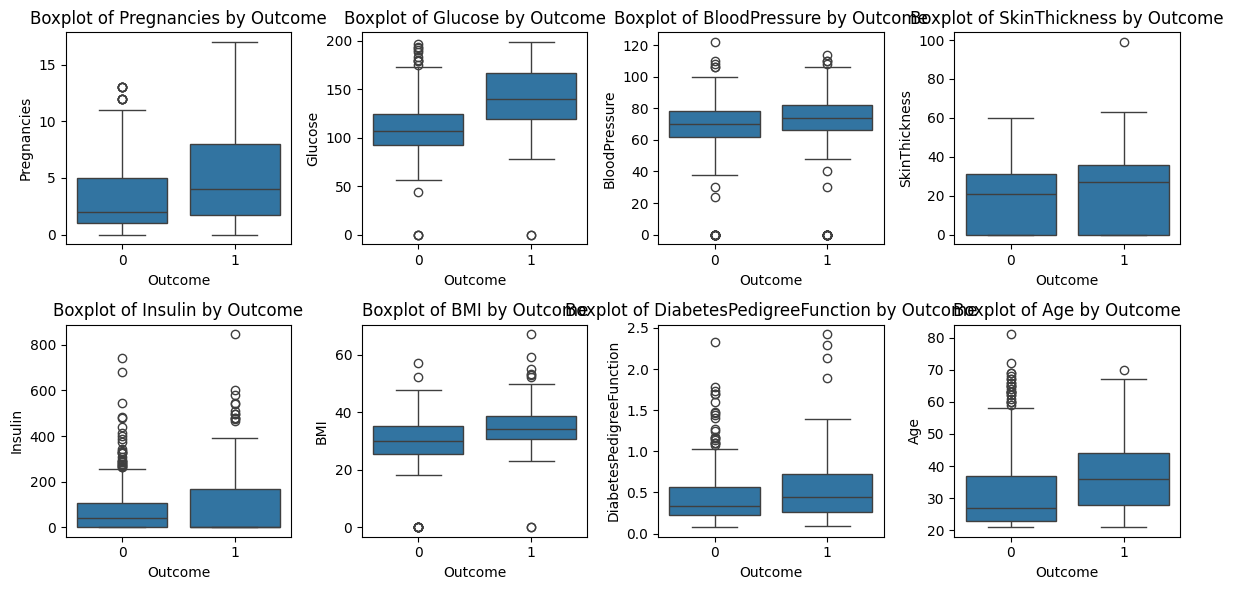

In [19]:
# Visualize feature distributions with boxplots for each feature, separated by the outcome class
plt.figure(figsize=(12, 6))
features = dataset.columns[:-1]  # Exclude 'Outcome' for boxplots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=feature, data=dataset)
    plt.title(f'Boxplot of {feature} by Outcome')
plt.tight_layout()
plt.show()

Boxplots are effective for visualizing and comparing distributions of features based on class labels.
<br>
They help identify key features that might be significant for predicting the target variable.

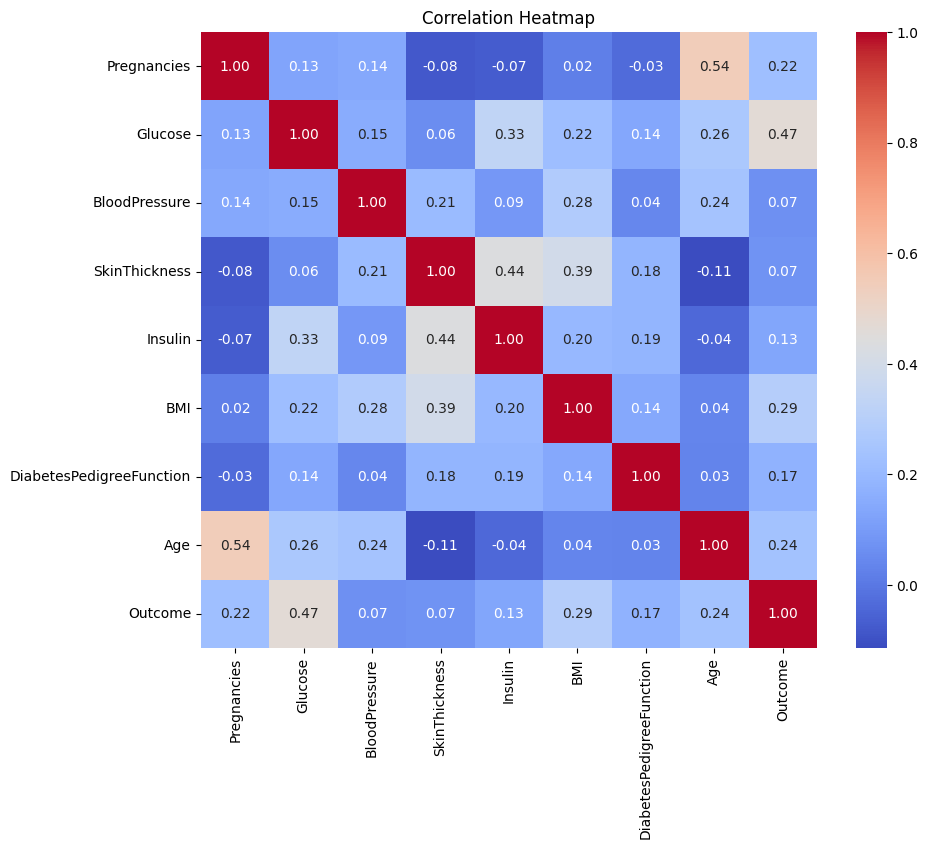

In [20]:
# Generate a heatmap to visualize correlation between features
plt.figure(figsize=(10, 8))
corr = dataset.corr()  # Calculate the correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

To visualize the correlation between features in the dataset.
<br>
To identify which features are strongly or weakly correlated, both positively and negatively.
<br>
To inform feature selection for modeling by understanding relationships between variables.

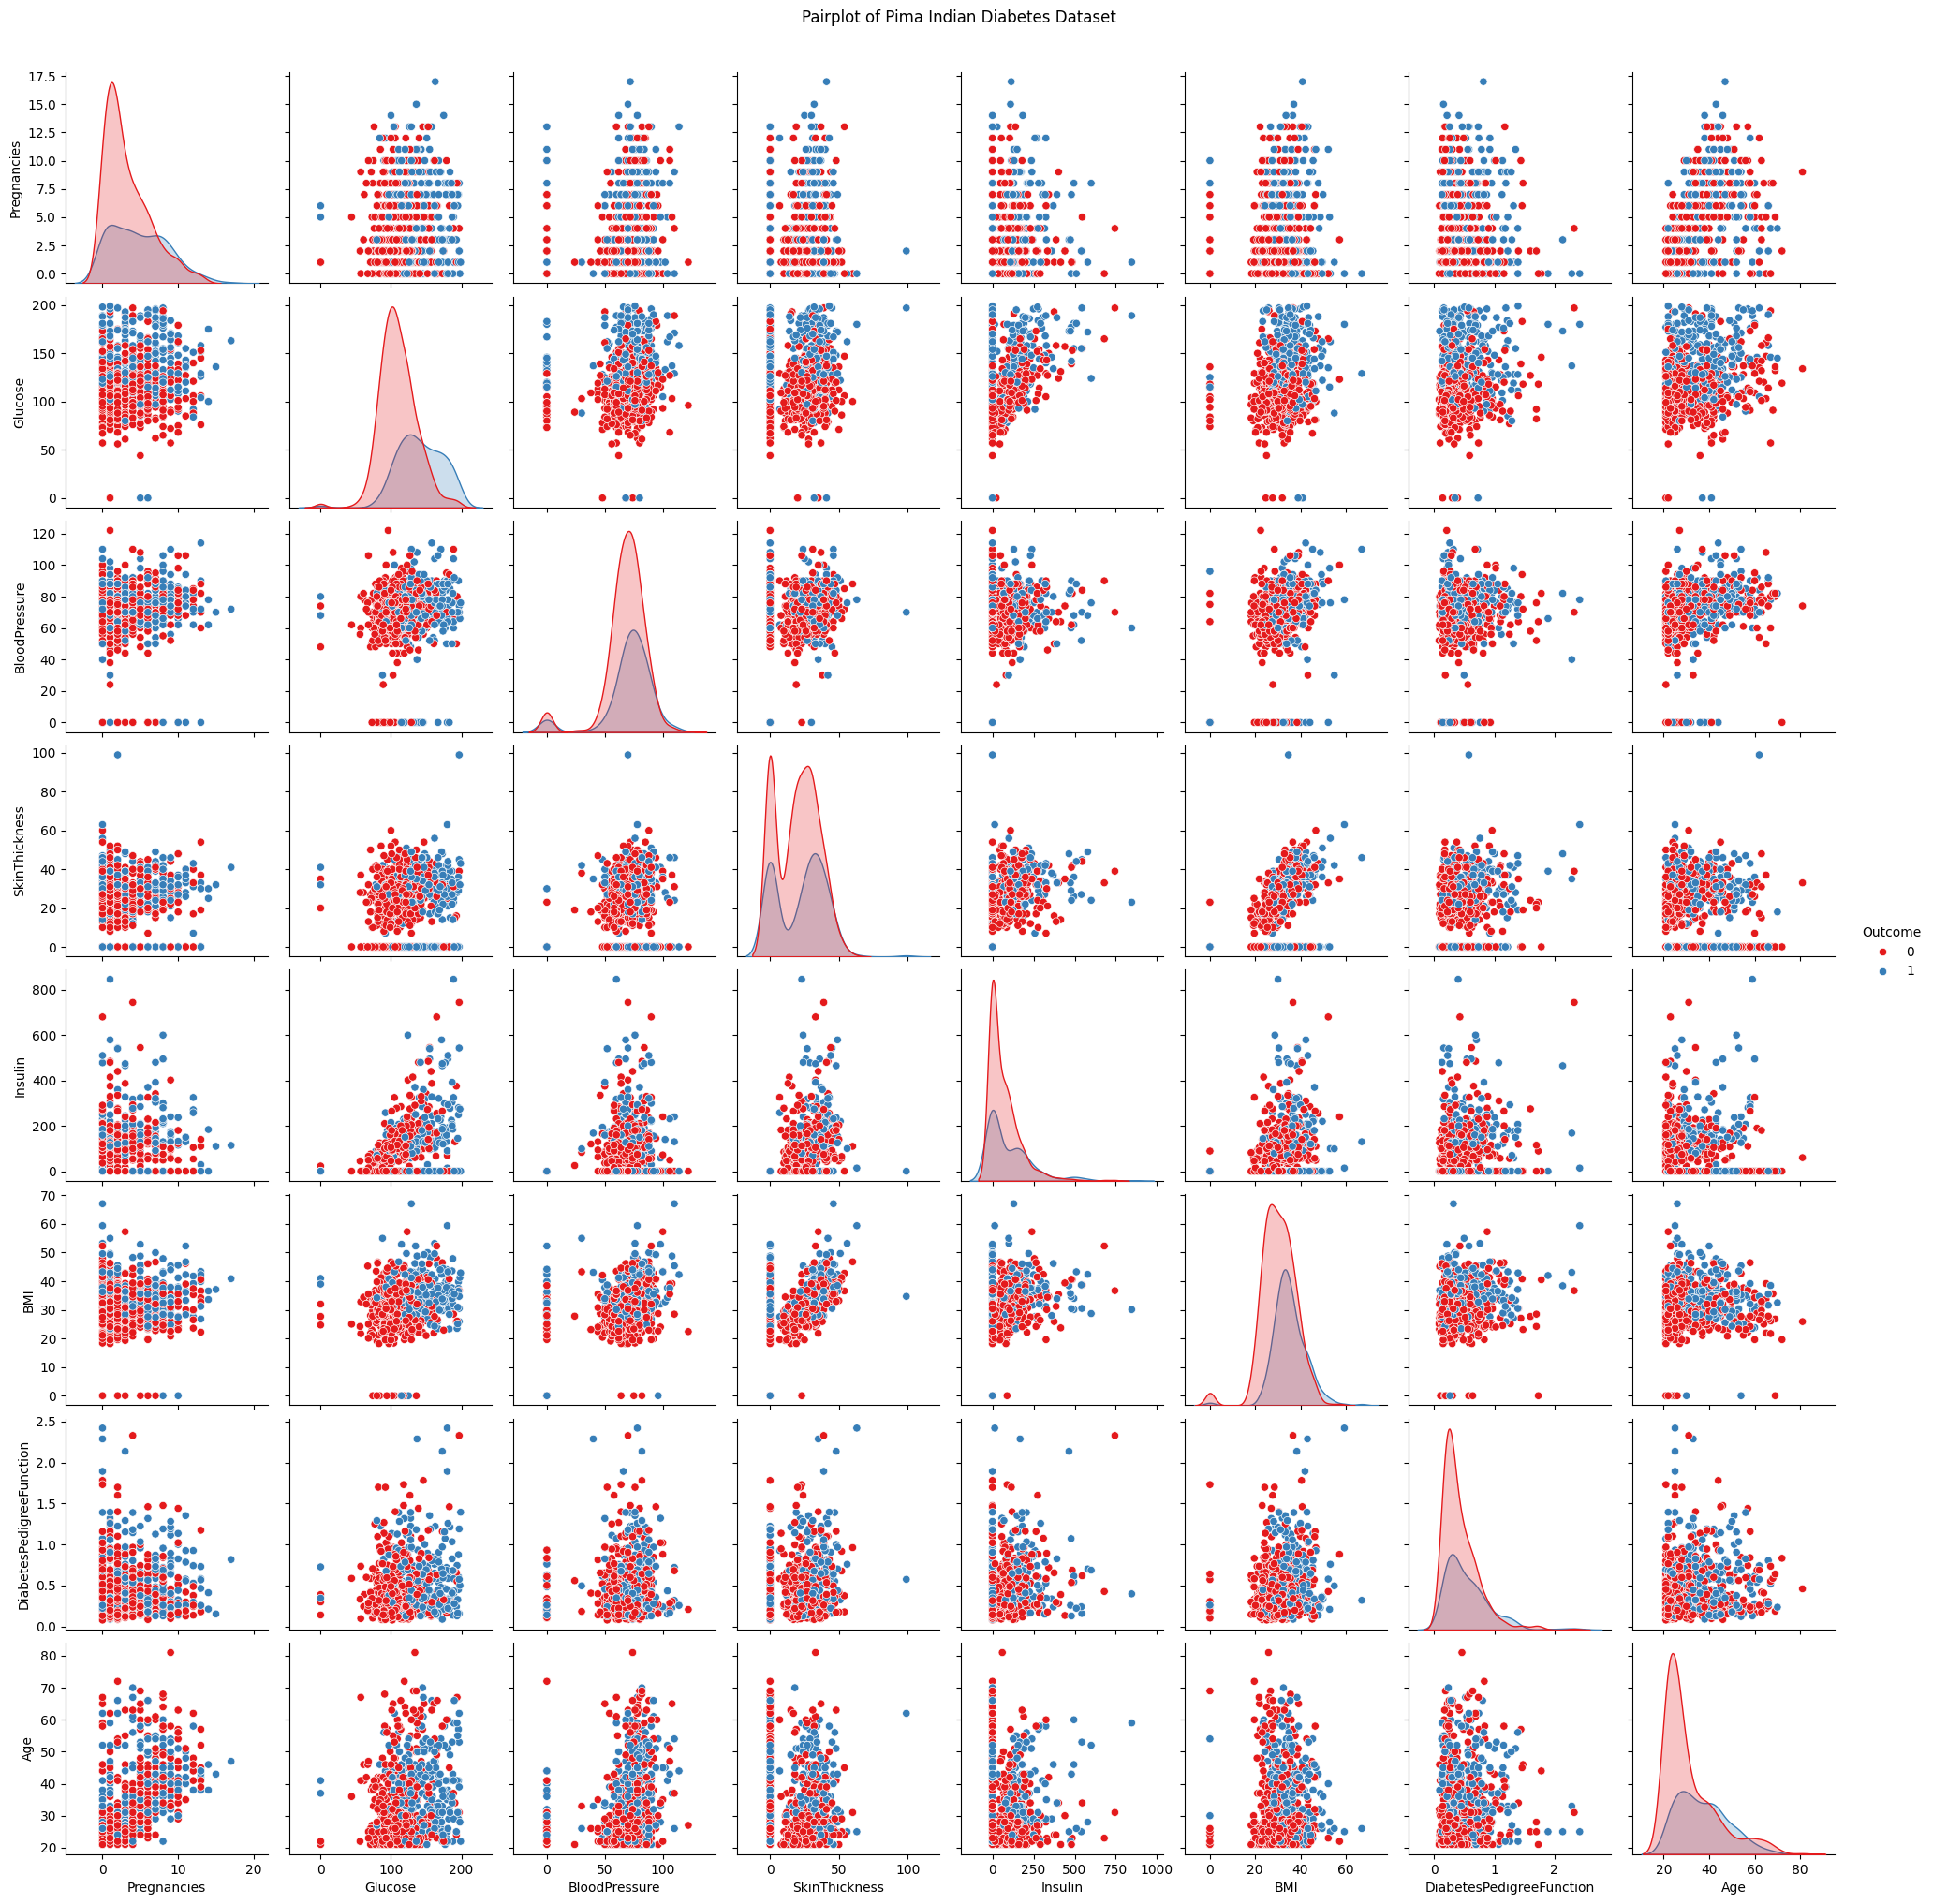

In [21]:
# Pairplot to visualize relationships between features, colored by 'Outcome'
sns.pairplot(dataset, hue='Outcome', palette='Set1')
plt.suptitle('Pairplot of Pima Indian Diabetes Dataset', y=1.02)
plt.show()

The pairplot provides a comprehensive view of relationships between features and their association with the target variable.
<br>
It serves as a preliminary analysis tool for feature selection and helps in understanding the data before modeling.

## Building and Training the Model

### Building the Model

In [22]:
# Import LogisticRegression from scikit-learn to build the classification model
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with a random state for reproducibility
model = LogisticRegression(random_state=0)

The code initializes a logistic regression model for binary classification tasks.
<br>
**from sklearn.linear_model import LogisticRegression:** Imports the LogisticRegression class from the Scikit-learn linear model module.
<br>
**model = LogisticRegression(random_state=0):** Creates an instance of the LogisticRegression model with a specified random_state for reproducibility

### Training the model

In [23]:
# Train (fit) the model using the training data
model.fit(X_train, y_train)


LogisticRegression(random_state=0)

The code trains the logistic regression model using the training data.
<br>
**model.fit(X_train, y_train):** Fits the logistic regression model to the training features **(X_train)** and corresponding labels **(y_train)**.
<br>

In [24]:
# Make predictions on the test set after scaling
y_pred = model.predict(sc.transform(X_test))

The code makes predictions on the test data using the trained logistic regression model.
<br>
**sc.transform(X_test):** Standardizes the test features using the same scaler fitted on the training data.
<br>
**y_pred = model.predict(...):** Uses the trained model to predict the target variable for the standardized test features

In [25]:
# Display the predicted outcomes for the test set
y_pred


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [26]:
# Display the actual outcomes for the test set
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

Making the prediction of a single data point with:

1. Pregnancies = 6
2. Glucose = 148
3. Blood Pressure = 72
4. Skin Thickness = 35
5. Insulin = 0
6. BMI = 33.6
7. Diabetes Pedigree Function = 0.627
8. Age = 50


In [27]:
# Example predictions using new data instances
model.predict(sc.transform([[6, 148, 72, 35, 0, 33.6, 0.627, 50]]))  # New patient 1



array([1])

The code predicts the target variable for a new input sample using the trained logistic regression model.
<br>
**sc.transform([[6, 148, 72, 35, 0, 33.6, 0.627, 50]]):** Standardizes the new input data (a list of features) using the same scaler fitted on the training data.
<br>
**model.predict(...):** Uses the trained model to predict the target variable based on the standardized input

Taking the prediction of a single data point with:

1. Pregnancies = 1
2. Glucose = 85
3. Blood Pressure = 66
4. Skin Thickness = 29
5. Insulin = 0
6. BMI = 26.6
7. Diabetes Pedigree Function = 0.351
8. Age = 31

In [28]:
model.predict(sc.transform([[1, 85, 66, 29, 0, 26.6, 0.351, 31]]))   # New patient 2

array([0])

## Evaluating the Model

### Accuracy 

In [29]:
# Import accuracy_score metric to evaluate prediction accuracy of the model
from sklearn.metrics import accuracy_score

# Calculate and display the accuracy of the model on the test set
y_pred = model.predict(sc.transform(X_test))  # Make predictions on test set
accuracy_score(y_test, y_pred)  # Calculate and display accuracy

0.8246753246753247

The code evaluates the accuracy of the logistic regression model's predictions on the test dataset.
<br>
**y_pred = model.predict(sc.transform(X_test)):** Makes predictions for the standardized test features.
<br>
**accuracy_score(y_test, y_pred):** Compares the true labels **(y_test)** with the predicted labels **(y_pred)** to calculate the accuracy of the model.

## Visualization

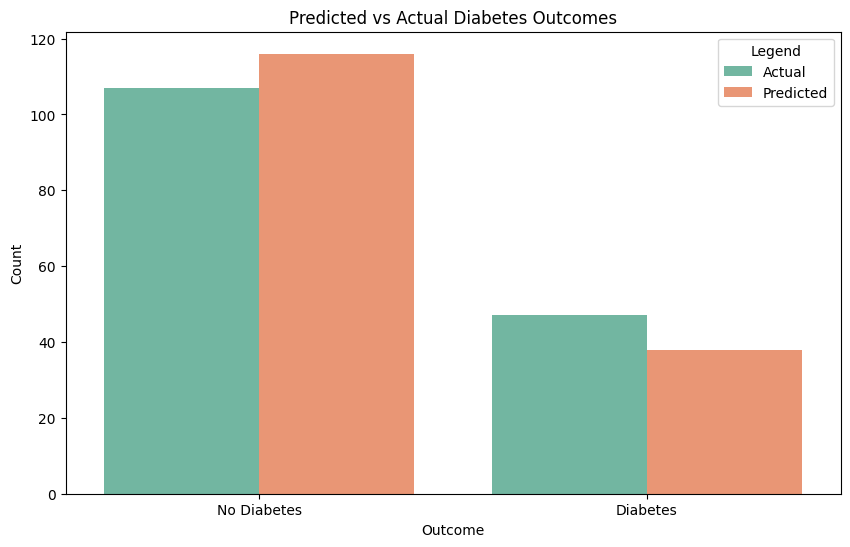

In [30]:
# Create a DataFrame to compare actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Visualize the count of actual vs predicted diabetes outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=results.melt(), x='value', hue='variable', palette='Set2')
plt.title('Predicted vs Actual Diabetes Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.legend(title='Legend', labels=['Actual', 'Predicted'])
plt.show()

The count plot visualizes the number of actual and predicted outcomes for diabetes, helping assess model performance.
<br>
It allows you to quickly see how many instances were correctly or incorrectly classified by the model, which aids in understanding the model's accuracy and potential areas for improvement.

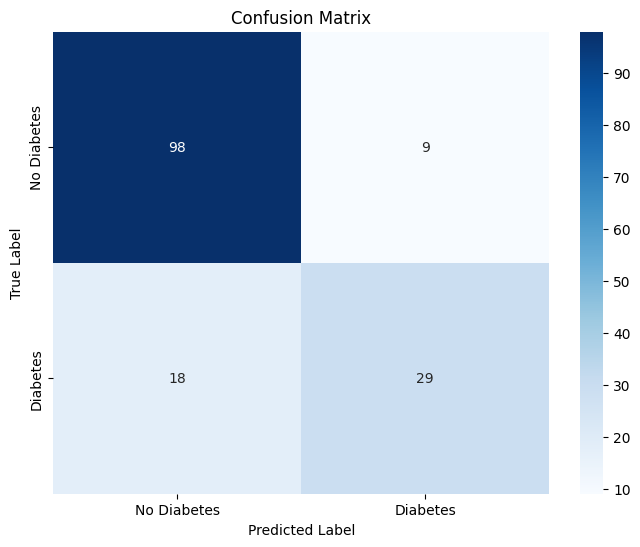

In [31]:
# Import confusion_matrix to visualize model performance on classification
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix for actual vs predicted outcomes
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix to show true positives, false positives, etc.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**confusion_matrix(y_test, y_pred):** Compares the true labels **(y_test)** with the predicted labels **(y_pred)** to create a matrix that summarizes the correct and incorrect predictions across different classes.
<br> 

**True Negatives (TN):** 98 patients correctly identified as not having diabetes.
<br>
**False Positives (FP):** 9 patients incorrectly identified as having diabetes.
<br>
**False Negatives (FN):** 18 patients incorrectly identified as not having diabetes.
<br>
**True Positives (TP):** 29 patients correctly identified as having diabetes.

In [32]:
# Calculate and display the accuracy using confusion matrix components
(98 + 29) / (98 + 29 + 18 + 9)

0.8246753246753247

**Precision** measures the accuracy of the positive predictions, defined as the ratio of true positives to the sum of true positives and false positives.  It is useful where the cost of false positives is high.

In [33]:
# Import and calculate F1 Score for model performance
from sklearn.metrics import f1_score

# Compute F1 score, which considers both precision and recall, for the model
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.6824


**F1 Score** is the harmonic mean of precision and recall, providing a balance between the two metrics. It’s particularly useful in situations with imbalanced classes, where you want to account for both false positives and false negatives.

In [34]:
# Import and calculate Recall Score for model performance
from sklearn.metrics import recall_score

# Compute recall score to measure sensitivity to positive outcomes
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.6170


**Recall** measures the ability of the model to identify all relevant instances (true positives), defined as the ratio of true positives to the sum of true positives and false negatives